In [1]:
from fastai.vision import *

## Getting data

In [2]:
mnist = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)

The structure of the data folder that contains the downloaded data is:
<br>
- `label.csv (Two columns: name (i.e. path), label. Total 1409 rows)`
- `models (a folder to save any newly trained (not pretrained) model)`
- `test (which as images 3 and 7)`
- `train`
    - `3 (which as images of 3)`
    - `7 (which as images of 7)`
- `valid`
    - `3 (which as images of 3)`
    - `7 (which as images of 7)`

### Set up an imagenet structure so we use it to load our training and validation datasets, then label, transform, convert them into ImageDataBunch and finally, normalize them.

Need to do this:

`data = (
    ImageList
    .from_folder(mnist)
    .split_by_folder()
    .label_from_folder()
    .transform(tfms, size=32)
    .databunch()
    .normalize(imagenet_stats)
)`

Some of the attributes the "data" contains are 'test_dl', 'test_ds', 'train_dl', 'train_ds', 'valid_dl', 'valid_ds'.

The images in the folder will not be changed after doing these steps. No new image.

Let's see each step

In [5]:
ImageList.from_folder(mnist)

ImageList (1428 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /Users/p787144/.fastai/data/mnist_tiny

In [6]:
(
    ImageList
    .from_folder(mnist)
    .split_by_folder()
)

ItemLists;

Train: ImageList (709 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /Users/p787144/.fastai/data/mnist_tiny;

Valid: ImageList (699 items)
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
Path: /Users/p787144/.fastai/data/mnist_tiny;

Test: None

In [8]:
(
    ImageList
    .from_folder(mnist)
    .split_by_folder()          
    .label_from_folder()
)

LabelLists;

Train: LabelList (709 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /Users/p787144/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /Users/p787144/.fastai/data/mnist_tiny;

Test: None

In [14]:
data = (
    ImageList
    .from_folder(mnist)
    .split_by_folder()          
    .label_from_folder()
    .transform(tfms, size=32)
    .databunch()
    .normalize(imagenet_stats)
)

In [15]:
data

ImageDataBunch;

Train: LabelList (709 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
7,7,7,7,7
Path: /Users/p787144/.fastai/data/mnist_tiny;

Valid: LabelList (699 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
7,7,7,7,7
Path: /Users/p787144/.fastai/data/mnist_tiny;

Test: None

<br>
<br>

- Call data.show_batch( ) to see what a sample of a batch looks like.
- Note that the images were automatically de-normalized before being showed with their labels (inferred from the names of the folder). 
- We can specify the number of rows, and limit the size of the figure.

## View

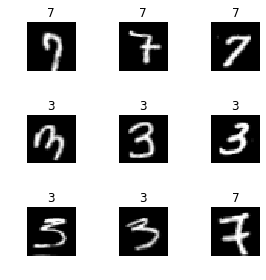

In [20]:
data.show_batch(rows=3, figsize=(4,4))

## Train

In [21]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

The "accuracy" is a metric that we set when we construct the learner. 

#### *Metrics are always calculated on the validation set.*

https://docs.fast.ai/training.html

In [25]:
learn.fit_one_cycle(3,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.276150,0.191399,0.929900,00:04
1,0.203208,0.066605,0.975680,00:04
2,0.157583,0.123880,0.971388,00:04


Save the model. Will see another way of saving by calling export( ).

In [26]:
learn.save('mini_train')

## View
Let's see the model's predictions on a sample of the validation set.

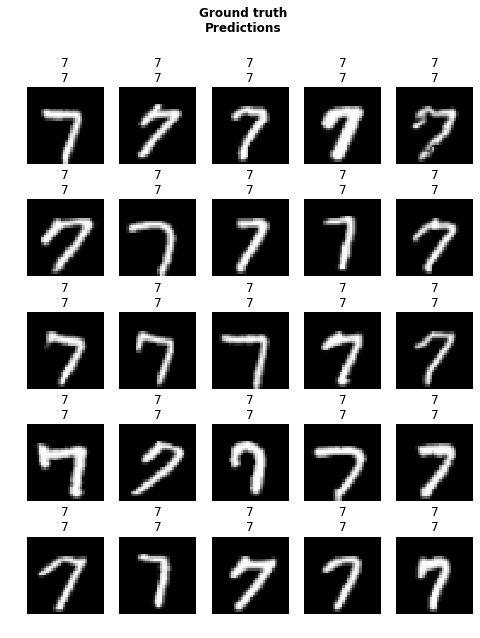

In [28]:
learn.show_results(figsize=(8,10))

- Since the validation set is usually sorted, we get only images belonging to the same class. 
- We can then again specify a number of rows, a figure size, but also the dataset on which we want to make predictions.

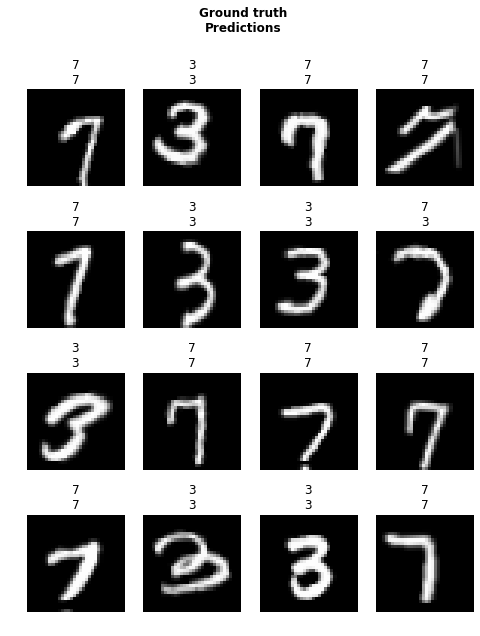

In [29]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))

In [31]:
learn.export()

<br>
<br>

## Inference

In [32]:
del learn

In [33]:
mnist

PosixPath('/Users/p787144/.fastai/data/mnist_tiny')

In [34]:
learn = load_learner(mnist)

Now predict on one image.

It returns a tuple of three things: the object predicted (with the class in this instance), the underlying data (here the corresponding index) and the raw probabilities.

In [43]:
img = data.train_ds[0][0]
learn.predict(img)

(Category 7, tensor(1), tensor([0.3960, 0.6040]))

Can also do inference on a larger set of data by adding a test set. This is done by passing an ItemList to load_learner.

In [44]:
learn = load_learner(mnist, test=ImageList.from_folder(mnist/'test'))

See 20 predictions (prob for 3, prob for 7) as there are 20 testing images. 

In [52]:
preds,y = learn.get_preds(ds_type=DatasetType.Test)
preds

tensor([[9.6022e-01, 3.9779e-02],
        [9.9065e-01, 9.3497e-03],
        [1.0000e+00, 5.0686e-07],
        [1.0000e+00, 5.3520e-08],
        [1.7748e-03, 9.9823e-01],
        [6.8558e-02, 9.3144e-01],
        [1.0000e+00, 3.8024e-11],
        [9.9841e-01, 1.5869e-03],
        [1.0000e+00, 1.2397e-06],
        [1.0000e+00, 1.0099e-07],
        [5.1167e-03, 9.9488e-01],
        [4.0851e-05, 9.9996e-01],
        [9.9998e-01, 2.0801e-05],
        [5.7966e-04, 9.9942e-01],
        [9.2134e-01, 7.8658e-02],
        [9.9377e-01, 6.2294e-03],
        [1.1753e-05, 9.9999e-01],
        [9.9956e-01, 4.4179e-04],
        [3.4887e-05, 9.9997e-01],
        [3.0508e-11, 1.0000e+00]])